LR: 0.773462 (0.048998)
LDA: 0.766969 (0.047966)
KNN: 0.710988 (0.050792)
CART: 0.690260 (0.058210)
NB: 0.759142 (0.038960)
SVM: 0.760458 (0.034712)


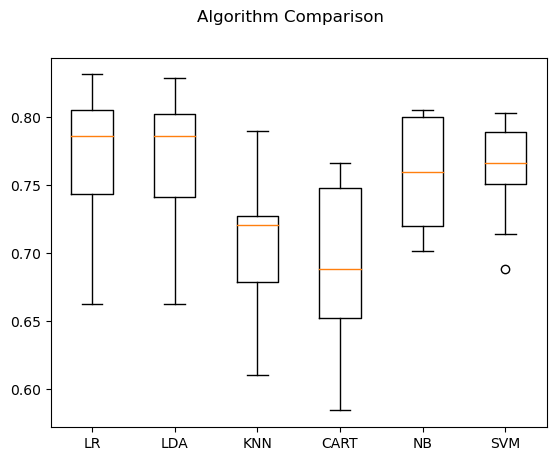

In [2]:
# 算法比较
from pandas import read_csv
from sklearn.model_selection import BaseShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt

filename = 'pima_data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names = names)
array = data.values # 读取数据
X = array[:, 0:8]
Y = array[:, 8]

kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
models = {}
models['LR'] = LogisticRegression(multi_class = 'multinomial', max_iter = 3000)
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()
models['NB'] = GaussianNB()
models['SVM'] = SVC()

results = []
for key in models:
    result = cross_val_score(models[key], X, Y, cv = kfold)
    results.append(result)
    print('%s: %f (%f)' % (key, result.mean(), result.std()))

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111) # 1行1列第1个
plt.boxplot(results)
ax.set_xticklabels(models.keys()) # 设置x轴标签
plt.show()

# 算法的优化

## 集成算法

### 集成算法的基本概念

集成算法是一种机器学习技术，其核心思想是**将多个学习模型组合起来，以提高整体模型的性能**，尤其是在**准确性**方面。这种方法基于一个简单但强大的前提：多个模型结合的预测结果通常比任何单一模型的预测结果更为准确和可靠。集成算法特别适用于解决单一模型难以克服的复杂问题，如过拟合或者对特定数据集的泛化能力较差的问题。

### 集成算法的关键要素：
1. **模型的多样性**：集成算法依赖于多个模型的多样性，每个模型学习数据的方式都略有不同。这些模型可以是同一算法的不同版本，或者是完全不同的算法。

2. **错误校正**：通过将多个模型的预测结果结合起来，可以减少单个模型可能产生的偏差和误差。这种集成方法能够在多个模型之间平衡误差，从而提高整体的预测准确性。

3. **减少过拟合**：单个模型可能会过度学习训练数据中的细节和噪声，导致其泛化能力下降（即在新数据上的表现不佳）。集成算法通过结合多个模型的预测，可以减轻这种过拟合的风险。

### 集成算法的主要类型：
1. **装袋（Bagging）**：它通过对原始训练数据进行多次随机采样（可重复抽样），创建多个**不同的训练数据子集**，然后**对每个数据子集训练一个模型**。最后，这些模型的预测结果被平均（回归问题）或投票（分类问题）来获得最终结果。典型的例子是随机森林算法。（并联）

2. **提升（Boosting）**：这种方法涉及到**按顺序**训练模型，**每一个后续的模型都致力于纠正前一个模型的错误**。提升算法的目标是增强模型的性能。在这个过程中，模型变得越来越专注于训练数据中**难以预测的部分**。著名的例子包括AdaBoost和梯度提升机（GBM）。（串联）

3. **堆叠（Stacking）**：在这种方法中，不同的模型被训练以解决同一个问题，然后一个新的模型（通常称为元模型）被训练来汇总这些模型的预测结果。堆叠方法尝试学习各个模型的预测结果如何结合起来可以提供最佳的性能。

### 袋装算法（Bagging）

- 装袋算法是一种提高**分类准确率**的算法，通过给定组合**投票**的方式获得最优解。
- 比如你生病了，去n个医院看了n个医生，每个医生都给你开了药方，最后哪个药方的出现次数多，就说明这个药方越有可能是最优解，这很好理解，这也是装袋算法的思想。

- 一共有三种装袋模型，将依次介绍：
  1. 装袋决策树(Bagged Decision Trees)
  2. 随机森林(Random Forest)
  3. 极端随机树(Extra Trees)

#### 1. 装袋决策树（Bagged Decision Trees）

- **概念**：装袋算法，特别是在决策树中的应用，是通过创建**多个决策树模型**的集合来提高分类的准确率。每个决策树都在数据集的**不同随机子集**上训练，最终通过投票的方式来确定最终的预测结果。
  
- **过程**：在装袋算法中，每个决策树都是**独立建立**的。算法从原始数据集中**随机选择（有放回抽样）子集**来训练每个树模型。这意味着，相同的样本可能在多个不同的树中被重复使用。最后，所有决策树的输出汇聚起来（例如，通过投票）以产生最终结果。

- **优势**：这种方法减少了模型对特定数据样本的敏感性，从而降低过拟合的风险。装袋决策树特别适用于**高方差**的数据集。

In [3]:
# 装袋决策树
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

filename = 'pima_data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names = names)

array = data.values # 读取数据
X = array[:, 0:8]
Y = array[:, 8]

kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
# 基模型
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(estimator = cart, n_estimators = num_trees, random_state = 7)
results = cross_val_score(model, X, Y, cv = kfold)

print(results.mean())

0.7578263841421736


#### 2. 随机森林（Random Forest）(Most Recommended)

- **概念**：随机森林是装袋算法的一个扩展，由许多决策树组成。每棵树的训练都是独立的，并且在进行预测时，随机森林考虑所有树的输出来做出最终决策。

- **特点**：在构建每棵树时，随机森林不仅**随机选择样本（行采样）（有放回）**，而且还**随机选择特征（列采样）**。这增加了模型的多样性，并进一步减少了过拟合的风险。

- **不剪枝**：与传统决策树相比，随机森林通常不对树进行剪枝。由于集成了许多树的预测，即使单棵树可能对某些样本的预测有偏差，整体模型仍然能够保持稳定的预测准确率。

- **类比理解**：每一棵决策树就是一个精通某一个领域的专家，这样在随机森林中就有了很多个精通不同领域的专家，对于一个新的问题（新的输入数据），可以从不同的角度去看待它，最
终由各个专家投票得到结果。

In [3]:
# 随机森林
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

filename = 'pima_data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names = names)

array = data.values # 读取数据
X = array[:, 0:8]
Y = array[:, 8]

kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
# 基模型
model = RandomForestClassifier(n_estimators = 100, random_state = 7, max_features = 3)
results = cross_val_score(model, X, Y, cv = kfold)

print(results.mean())

0.759107997265892


#### 3. 极端随机树（Extra Trees）(Less Recommended)

- **概念**：极端随机树算法与随机森林类似，但在分裂节点时采取更加随机的策略。

- **区别**：
  1. **样本使用**：与随机森林使用有放回抽样不同，极端随机树通常使用全部的训练数据来训练每一棵树。
  2. **特征分裂**：在确定分裂节点时，随机森林会在随机选择的特征子集中找到最优分裂，而极端随机树则是完全随机选择分裂点，这增加了模型的随机性。

- **优势与应用**：极端随机树因其随机性在某些情况下可以提供比随机森林更好的性能，特别是在需要降低模型训练时间的情况下。

In [5]:
# 极端随机树
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier

filename = 'pima_data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names = names)

array = data.values # 读取数据
X = array[:, 0:8]
Y = array[:, 8]

kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
# 基模型
model = ExtraTreesClassifier(n_estimators = 100, random_state = 7, max_features = 3)
results = cross_val_score(model, X, Y, cv = kfold)

print(results.mean())

0.7630211893369789


### 提升算法（Boosting）

提升算法是一种强大的集成技术，用于提高一系列弱分类器的整体性能。这种方法的核心在于将多个简单的模型（通常称为弱学习器）组合成一个强大的整体模型。提升算法与装袋算法的主要区别在于，它是**按顺序**逐步构建模型（串联），而不是**并行构建**（并联）。

- 提升算法的工作原理：
  1. **序列模型构建**：在提升算法中，每个新的模型都是**在之前模型的基础上**构建的。初始时，算法从一个简单的模型开始，然后逐步添加新模型，**每个新模型都致力于改正前一个模型的错误**。
  2. **强调错误**：提升算法通过增加那些被之前模型错误分类的样本的权重，来引导后续模型的学习。这意味着随着每一轮的学习，算法都会更加关注那些难以分类的案例。
  3. **加权投票**：最终的模型是通过组合所有简单模型的加权预测结果得出的。在这个过程中，每个模型的影响力通常取决于其准确性，准确性更高的模型会有更大的权重。

- 提升算法的关键优点：
  1. **减少偏差**：提升算法主要是减少模型的偏差，即它能够帮助模型在训练数据上取得更好的表现。
  2. **提高准确度**：即使基学习器的性能较弱，通过逐步提升也能达到很高的准确度。
  3. **降低过拟合的风险**：虽然提升算法在每一步都增加模型复杂度，但它**通常不会导致过拟合**。

- 常见的提升算法：
  1. **AdaBoost（自适应增强）**：AdaBoost是最初的提升算法之一，它通过在每一轮中调整样本的权重，使得之前分类错误的样本在后续模型中得到更多关注。
  2. **随机梯度提升（Stochastic Gradient Boosting）**：这种方法结合了梯度提升的思想和随机性。在每一步，它不仅关注于减少模型的损失函数，而且还通过随机选择样本和特征来增加训练过程的随机性，从而提高模型的鲁棒性。

#### 1. AdaBoost

AdaBoost（Adaptive Boosting）是提升算法家族中最著名和广泛使用的算法之一。它的核心思想是将多个弱分类器（通常是非常简单的模型）组合成一个强分类器。(迭代思想与加权思想)

##### AdaBoost工作原理：
1. **初始化权重**：AdaBoost以等权重开始训练数据中的每个样本。
2. **迭代训练**：在每一轮迭代中，算法训练一个弱分类器。最初，所有的样本都被平等对待。
3. **更新权重**：在每轮迭代后，**被错误分类的样本的权重会增加，而正确分类的样本的权重会减少**。这意味着随着算法的进行，模型会越来越关注那些难以正确分类的样本。
4. **模型加权**：每个弱分类器都会根据其准确性被赋予一个权重,**更准确的分类器会有更高的权重**。
5. **组合模型**：最终的模型是这些加权弱分类器的组合。

##### AdaBoost特点：
- **适用性**：AdaBoost对分类问题特别有效，它能够排除不必要的训练数据特征，关注最有影响的特征。
- **灵活性**：可以与任何学习算法结合，不限于决策树。
- **自适应性**：在每一轮中自动调整，能够自适应地改进分类器的性能。



In [6]:
# AdaBoost
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

filename = 'pima_data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names = names)

array = data.values # 读取数据
X = array[:, 0:8]
Y = array[:, 8]

kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
# 基模型
model = AdaBoostClassifier(n_estimators = 30, random_state = 7)
results = cross_val_score(model, X, Y, cv = kfold)

print(results.mean())

0.7552802460697198


### 2 随机梯度提升（Gradient Boosting）

随机梯度提升（Stochastic Gradient Boosting）是一种更先进的提升技术，它基于梯度提升机（GBM）的思想，但引入了随机性来提高鲁棒性。

#### 随机梯度提升工作原理：
1. **梯度提升**：基本概念是逐步构建模型，每一步都尝试纠正前一步的错误。它通过最小化损失函数的梯度来优化模型。
2. **随机性引入**：与传统GBM相比，随机梯度提升在每一步中不是使用所有数据，而是使用数据的随机子集来训练基学习器，这减少了方差，增加了模型的泛化能力。
3. **逐步优化**：每个新模型都是为了减少整体模型的损失。该算法会计算损失函数的梯度，并使用这个信息来更新模型。

#### 随机梯度提升特点：
- **效率高**：由于每次只用部分样本，计算效率高于传统GBM。
- **避免过拟合**：随机选择子集有助于降低过拟合风险。
- **灵活应用**：适用于各种类型的预测问题，包括分类和回归。

In [7]:
# 随机梯度提升
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

filename = 'pima_data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names = names)

array = data.values # 读取数据
X = array[:, 0:8]
Y = array[:, 8]

kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
# 基模型
model = GradientBoostingClassifier(n_estimators = 100, random_state = 7)
results = cross_val_score(model, X, Y, cv = kfold)

print(results.mean())

0.7591934381408066


### 投票算法（Voting）

投票算法（Voting）是一种在集成学习中常见的技术，它结合了多个不同的模型来做出最终的预测。这种方法基于一个简单的前提：多个模型共同作出的决策通常比任何单个模型作出的决策更为准确和可靠。

- 投票算法的工作原理：
  1. **组合模型**：在投票算法中，首先会创建**两个或多个不同的机器学习模型**。这些模型可以是完全不同的算法（如决策树、支持向量机、K近邻等）。
  2. **预测与投票**：每个模型都会对相同的数据集进行预测。在分类问题中，'投票'通常是指**选择多数模型预测为某一类别的那个类别**。这可以是简单多数投票（硬投票）或平均概率投票（软投票）。
  3. **硬投票与软投票**：
      - **硬投票**：每个模型的预测结果被视为一个'投票'，最终结果是基于**最多投票**的类别。
      - **软投票**：考虑每个模型预测每个类别的概率，最终结果是基于**平均概率最高**的类别。
  4. **加权投票**：尽管scikit-learn中的`VotingClassifier`默认不提供加权投票机制，我们仍可以通过调整模型在集成中的权重来间接实现加权投票。这种方法可以使某些模型对最终预测的影响更大。

- 投票算法的应用场景：
  1. **提高准确度**：当有多个表现良好但差异较大的模型时，使用投票算法可以提高预测的准确性。
  2. **减少过拟合**：由于模型的多样性，投票算法可以减少过拟合的风险，提高模型在未见数据上的泛化能力。
  3. **实现简单**：投票算法相比其他更复杂的集成方法（如堆叠）来说，实现起来更为简单直接。

In [12]:
# 投票算法
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier # 装袋决策树
from sklearn.svm import SVC # 支持向量机
from sklearn.linear_model import LogisticRegression # 逻辑回归

filename = 'pima_data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names = names)

array = data.values # 读取数据
X = array[:, 0:8]
Y = array[:, 8]

kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
# 基模型
estimators = []
model_lr = LogisticRegression(multi_class = 'multinomial', max_iter = 3000)
estimators.append(('logistic', model_lr))
model_cart = DecisionTreeClassifier()
estimators.append(('cart', model_cart))
model_svc = SVC()
estimators.append(('svm', model_svc))
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv = kfold)

print(results.mean())

0.7708646616541354


## 算法调参

在机器学习中，算法调参（或超参数优化）是一个关键的步骤，它直接影响着模型的性能和预测准确度。超参数是指在学习过程开始之前设置的参数，与模型训练过程中学习的参数不同。正确的调参可以显著提高模型对新数据的预测能力。

### 调参的重要性

1. **影响模型性能**：不同的参数设置会导致截然不同的模型性能。
2. **过拟合与欠拟合**：调整参数可以帮助模型在训练集上取得更好的准确度，同时防止过拟合，即保持对新数据的泛化能力。

### 参数类型

1. **影响训练准确度或防止过拟合的参数**：例如，决策树的深度、神经网络的层数或学习速率等。（主要）
2. **不影响准确度或过拟合的参数**：通常关于计算效率，如随机森林中的树的数量等。

### 调参原则

遵循**偏差**与**方差**协调的原则。

### 自动寻找最优化参数的方法

1. 网格搜索（Grid Search）
2. 随机搜索（Random Search）

### 网格搜索（Grid Search）

#### 网格搜索的概念
网格搜索是一种超参数优化技术，用于系统地遍历多种预设的参数组合，以找到最佳的模型配置。这种方法通过指定一个参数值的'网格'，然后尝试网格中的每一种组合，来确定哪一组参数为模型提供了最佳性能。

#### 网格搜索的过程

1. **定义参数网格**：确定想要优化的**模型参数**及**其可能的值范围**。
2. **选择评分标准**：确定用于评估模型性能的标准，如**准确率**或**均方误差**。
3. **设置交叉验证**：确定**交叉验证的方法**，以便在不同的数据子集上评估模型。
4. **遍历参数组合**：系统地测试参数网格中的所有参数组合。
5. **选择最优组合**：根据评分标准选择表现最好的参数组合。
6. **重新训练模型**：使用最优参数组合在全部数据上重新训练模型。

#### 网格搜索的优点
1. **系统性**：能够**穷尽**搜索参数网格中的所有可能组合，保证了找到最优参数的可能性。
2. **简单直接**：易于理解和实现，尤其适合参数数量较少时使用。
3. **全面性**：由于它遍历了所有可能的参数组合，因此对于较小的数据集和较少的参数组合，它非常有效。

#### 网格搜索的缺点
1. **计算成本高**：随着参数数量和范围的增加，需要评估的模型数量呈指数级增长，可能导致计算成本非常高。
2. **效率低**：对于每一种参数组合，网格搜索都需要从头到尾完整地训练模型，即使某些参数的效果明显较差。
3. **灵活性差**：固定的网格限制了搜索的灵活性。如果最优参数落在网格之外，网格搜索无法找到它。

#### 网格搜索的应用场景
网格搜索适合于参数数量较少，且对每个参数的可能值范围有较好理解的情况。在这些情况下，它可以提供一个简单且有效的方法来优化模型的性能。

In [16]:
# 网格搜索
from pandas import read_csv
from sklearn.linear_model import Ridge # 岭回归
from sklearn.model_selection import GridSearchCV # 网格搜索

filename = 'pima_data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names = names)

array = data.values # 读取数据
X = array[:, 0:8]
Y = array[:, 8]

model = Ridge()
para_grid = {'alpha': [1, 0.1, 0.01, 0.001, 0]}
grid = GridSearchCV(estimator = model, param_grid = para_grid)
grid.fit(X, Y)

print("The best score: %.3f" % grid.best_score_)
print("The best estimator:", grid.best_estimator_.alpha)

The best score: 0.276
The best estimator: 1


### 随机搜索优化参数（Random Search for Hyperparameter Optimization）

随机搜索优化参数（Random Search for Hyperparameter Optimization）是一种高效的参数优化方法，特别适用于**参数空间较大时**的情况。

#### 随机搜索优化参数的基本概念

随机搜索通过在预定义的参数范围内进行随机采样来寻找最佳参数。与网格搜索不同，它不会尝试所有可能的参数组合，而是从参数的分布中随机选择，进行固定次数的迭代。

#### 随机搜索优化参数的过程

1. **定义参数分布**：为每个参数定义一个概率分布。例如，可以为正则化参数定义一个均匀分布或对数分布。
2. **随机采样**：从这些分布中**随机采样**参数值，而不是像网格搜索那样遍历预设的参数列表。
3. **评估模型**：使用这些随机生成的参数组合来训练模型，并通过交叉验证评估其性能。
4. **选择最佳参数**：重复此过程固定次数后，选择表现最佳的参数组合。

#### 随机搜索优化参数的优点

1. **高效性**：特别适用于参数空间庞大的情况，因为它不需要遍历所有可能的参数组合。
2. **灵活性**：可以更灵活地定义参数的概率分布。
3. **快速收敛**：通常能够更快地找到一个好的和接近最优的参数组合。

#### 随机搜索优化参数的缺点

1. **可能错过最优解**：由于是随机采样，有可能错过最优参数组合。
2. **依赖于迭代次数**：性能很大程度上依赖于迭代的次数，次数太少可能得不到好的结果。

#### 随机搜索优化参数的应用场景

随机搜索特别适合于**参数维度较高**的情况。在参数数量众多且不清楚哪些参数是影响模型性能的关键因素时，随机搜索提供了一个既高效又实用的方法。

In [18]:
# 随机搜索
from pandas import read_csv
from sklearn.linear_model import Ridge # 岭回归
from sklearn.model_selection import RandomizedSearchCV # 随机搜索
from scipy.stats import uniform # 均匀分布

filename = 'pima_data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names = names)

array = data.values # 读取数据
X = array[:, 0:8]
Y = array[:, 8]

model = Ridge()
para_grid = {'alpha': uniform()} # 默认0-1均匀分布
grid = RandomizedSearchCV(estimator = model, param_distributions = para_grid, n_iter = 100, random_state = 7)
grid.fit(X, Y)

print("The best score: %.3f" % grid.best_score_)
print("The best estimator: %.3f" % grid.best_estimator_.alpha)

The best score: 0.276
The best estimator: 0.978
